# <u>Linear Regression Assignment-Prediction of demand for shared bikes</u>

### <u>Problem Statment</u>

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario.In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

The company wants to know:
1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands

Goal:
1. Develop a model to find the variables which are significant the demand for shared bikes with the available independent variables.
2. It will be used by the management to understand and manipulate the business strategy to meet the demand levels and meet the customer's expectations.

The Solution is divided into the four following sections:

-  Data Understanding and exploration
-  Data Visualisation
-  Data Preparation
-  Model building and evaluation

### <u>Importing Libraries<u>

In [1]:
#imporitng the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

### <u>Reading and Understanding the following data</u>

In [2]:
#Read the csv file using pandas
bikeSharing_data = pd.read_csv('C:/Users/Acer/Downloads/day.csv')

In [3]:
#Inspect first few rows
bikeSharing_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#check the rows and columns
bikeSharing_data.shape

(730, 16)

In [5]:
#looking dataframe for null and datatype 
bikeSharing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#looking deatils for numeriacl data
bikeSharing_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
#checking  datatypes of data
bikeSharing_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

#### From above datas we can see that there are 730 rows and 16 columns in the data set. There are no null values in any of the columns.


### <u>Data Cleaning</u>

##### Drop columns that are not useful for analysis
    1. instant is just a row identifier.
    2. dteday(date) will be removed as we have some of date features like month and year and weekday in other column
    3. Casual and registered variables will not be available for prediction and also there is target variable cnt(count of total rental bikes including both casual and registered) in a very explaining way target = registered+Casual, which  will leads to data leakage.

In [8]:
#Adding a old_businessdays variable which will indicates how old is the business
bikeSharing_data['old_business_days'] = (pd.to_datetime(bikeSharing_data['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [9]:
bikeSharing_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,old_business_days
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [10]:
# Droping instant column as it is an index col.
bikeSharing_data.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as we already has month and weekday col.
bikeSharing_data.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered col. as as we have cnt column which is sum of the both col. and also that is the target column

bikeSharing_data.drop(['casual'], axis = 1, inplace = True)
bikeSharing_data.drop(['registered'], axis = 1, inplace = True)

In [11]:
#Checking data after dropping some cols.
bikeSharing_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,old_business_days
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [12]:
bikeSharing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season             730 non-null    int64  
 1   yr                 730 non-null    int64  
 2   mnth               730 non-null    int64  
 3   holiday            730 non-null    int64  
 4   weekday            730 non-null    int64  
 5   workingday         730 non-null    int64  
 6   weathersit         730 non-null    int64  
 7   temp               730 non-null    float64
 8   atemp              730 non-null    float64
 9   hum                730 non-null    float64
 10  windspeed          730 non-null    float64
 11  cnt                730 non-null    int64  
 12  old_business_days  730 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 74.3 KB


In [13]:
bikeSharing_data.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [14]:
bikeSharing_data['weathersit'].unique()

array([2, 1, 3], dtype=int64)

In [15]:
#Checking correaltions between all the columns with the help of corr()
bikeSharing_data.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,old_business_days
season,1.000000e+00,-2.248195e-17,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584,0.413587
yr,-2.248195e-17,1.000000e+00,-2.470170e-17,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728,0.866026
mnth,8.310321e-01,-2.470170e-17,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191,0.498251
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764,0.016275
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534,-0.000023
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542,-0.004619
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929,-0.021862
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044,0.150738
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685,0.152773
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543,0.016080


### <u>Handling Missing values Now</u>

In [16]:
bikeSharing_data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'old_business_days'],
      dtype='object')

In [17]:
bikeSharing_data.nunique()

season                 4
yr                     2
mnth                  12
holiday                2
weekday                7
workingday             2
weathersit             3
temp                 498
atemp                689
hum                  594
windspeed            649
cnt                  695
old_business_days    730
dtype: int64

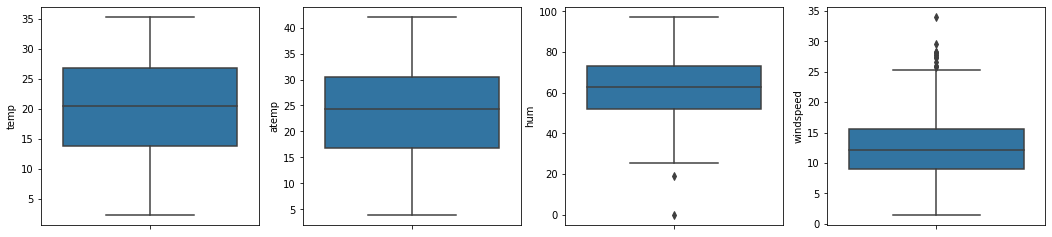

In [18]:
#Plotting for indepent variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bikeSharing_data)
    i+=1

From all above plots,it can be seen that there are no outliers.We are good with above plots which do not have any outliers.

### <u>Exploratory Data Analysis</u>

In [19]:
#Replacing all weathersit names into string values for better readability and understanding

#1: Clear, Few clouds, Partly cloudy, Partly cloudy
bikeSharing_data.loc[(bikeSharing_data['weathersit']== 1), 'weathersit'] = 'good'

#2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
bikeSharing_data.loc[(bikeSharing_data['weathersit']== 2), 'weathersit'] = 'moderate'    

#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
bikeSharing_data.loc[(bikeSharing_data['weathersit']== 3), 'weathersit'] = 'bad'

#4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
bikeSharing_data.loc[(bikeSharing_data['weathersit']== 4), 'weathersit'] = 'severe'


In [20]:
#Replacing all seasons from continous to categorical values
bikeSharing_data.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

In [21]:
#Replacing months from continous to categorical values
bikeSharing_data.mnth = bikeSharing_data.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})


In [22]:
#Replacing Weekday from continous to categorical values for understanding
bikeSharing_data.weekday = bikeSharing_data.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})


In [23]:
bikeSharing_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,old_business_days
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600,4


#### Plotting pair plots for checking the linear relationship

<Figure size 1080x2160 with 0 Axes>

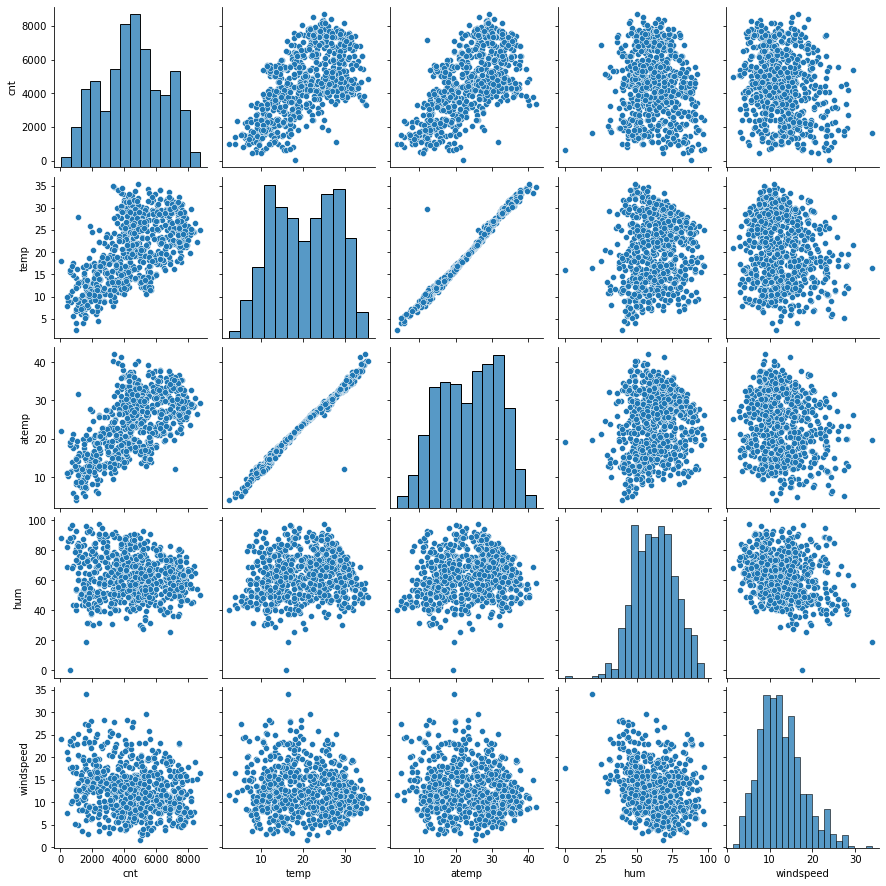

In [24]:
#Draw pairplots for continuous numeric variables using seaborn
plt.figure(figsize = (15,30))
sns.pairplot(data=bikeSharing_data,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

##### <u>Conclusion</u>:
- It is clearly seen that the atemp and temp has the highest cor-relation with the target variable cnt.
- temp and atemp are highly cor-related with each other
- As seen from the correlation plots, target variable has a linear relationship with variables like temp, atemp

#### Visualising the Data for finding correlation between the numerical Variable

<Figure size 1440x1080 with 0 Axes>

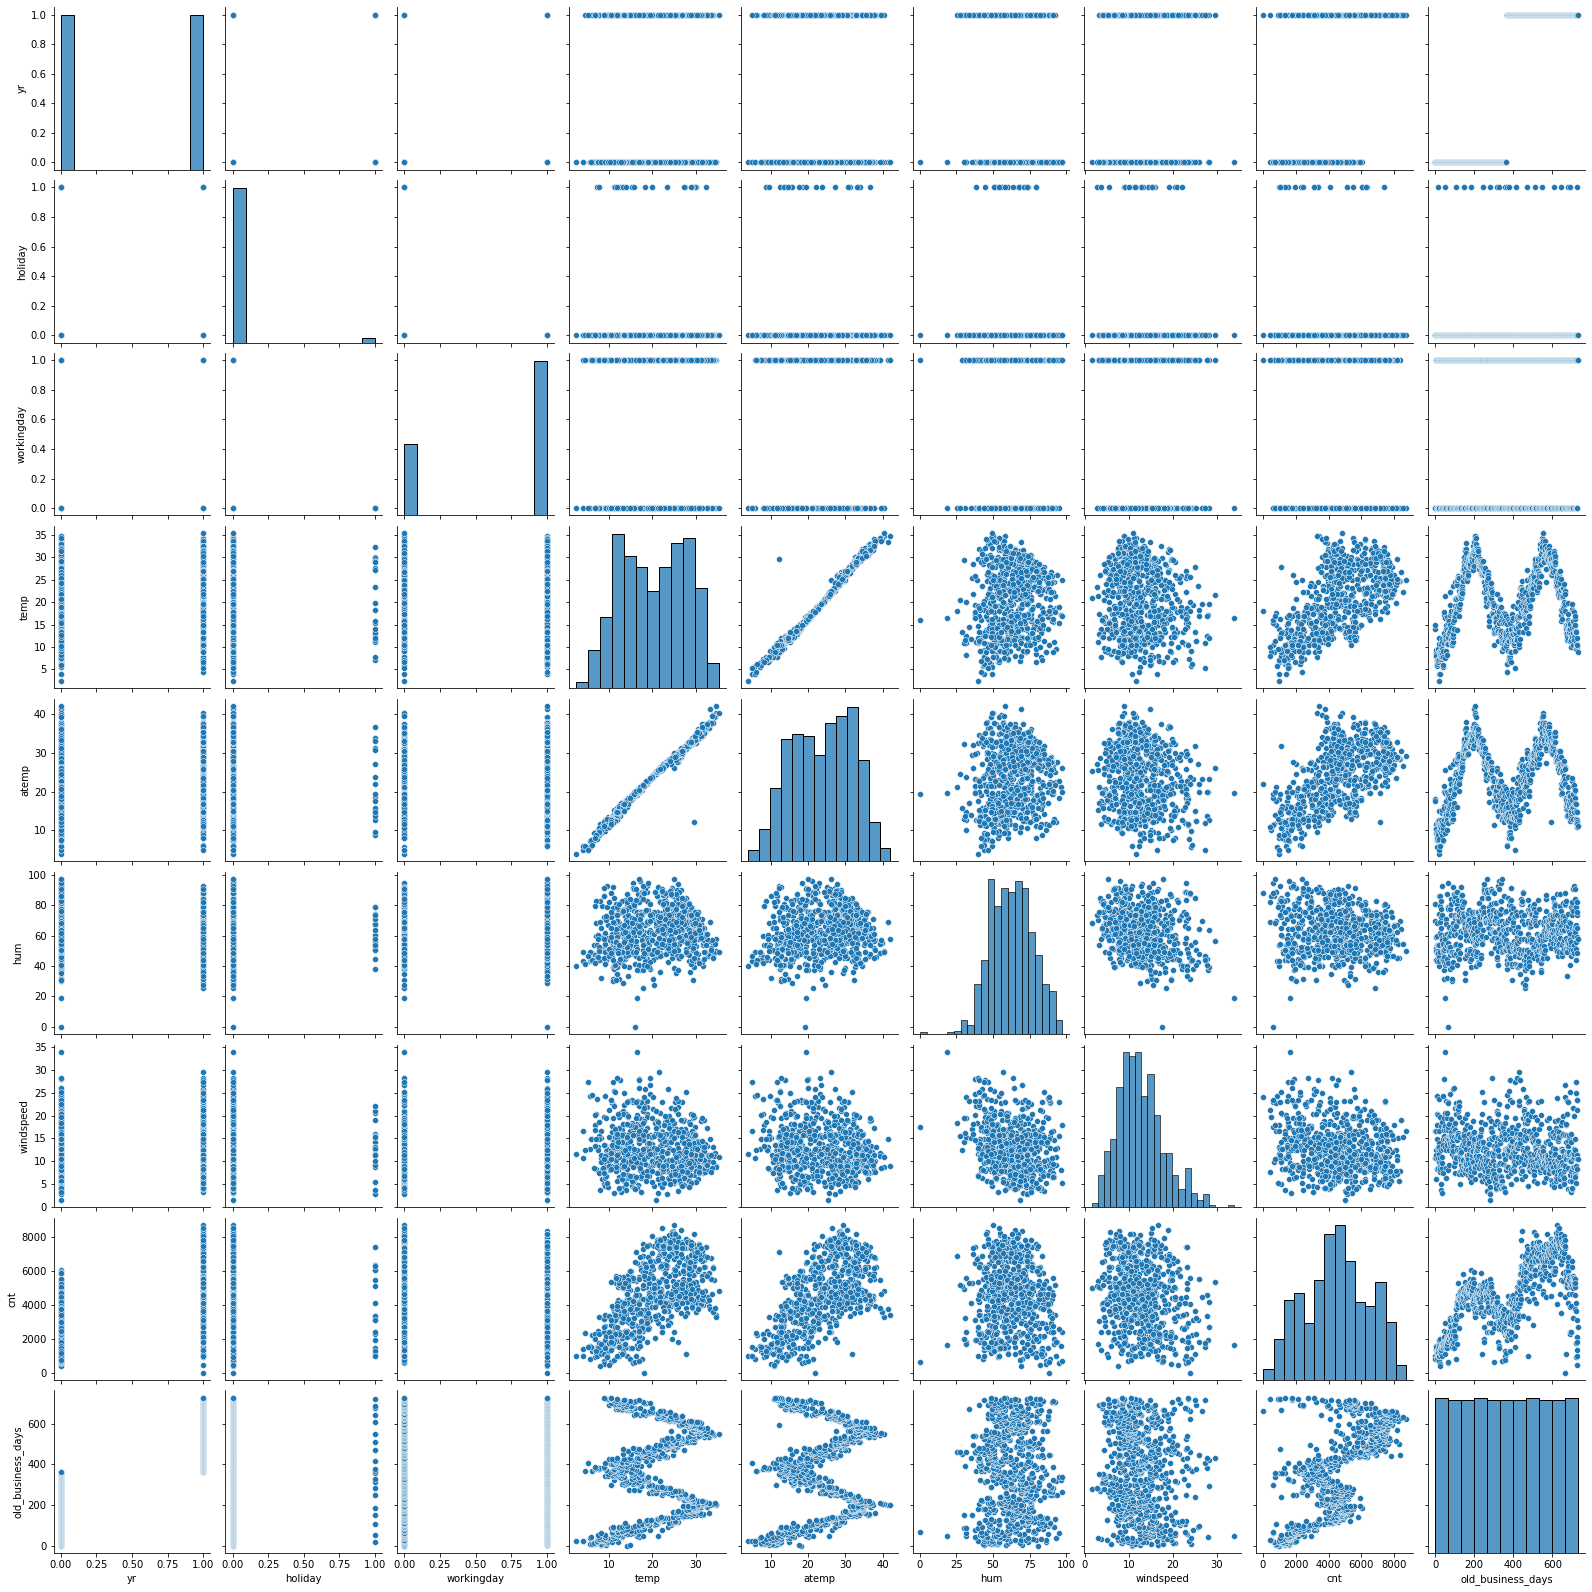

In [25]:
plt.figure(figsize=(20,15))
sns.pairplot(bikeSharing_data)
plt.show()

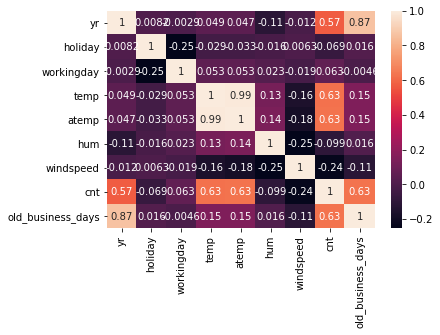

In [26]:
#Correlations for numeric variables
cor=bikeSharing_data.corr()
sns.heatmap(cor,annot = True)
plt.show()

Here on above map it is clearly shown that temp and atemp has correlation by 0.99 means almost 1 (highly correlated) and atemp seems to be derived from temp so atemp field can be dropped here only

We can also see that days_old seems to be highly correlated.
We can also see target variable has a linear relationship with some of the indeptendent variables.

#### Visualizing Categorical Variabels

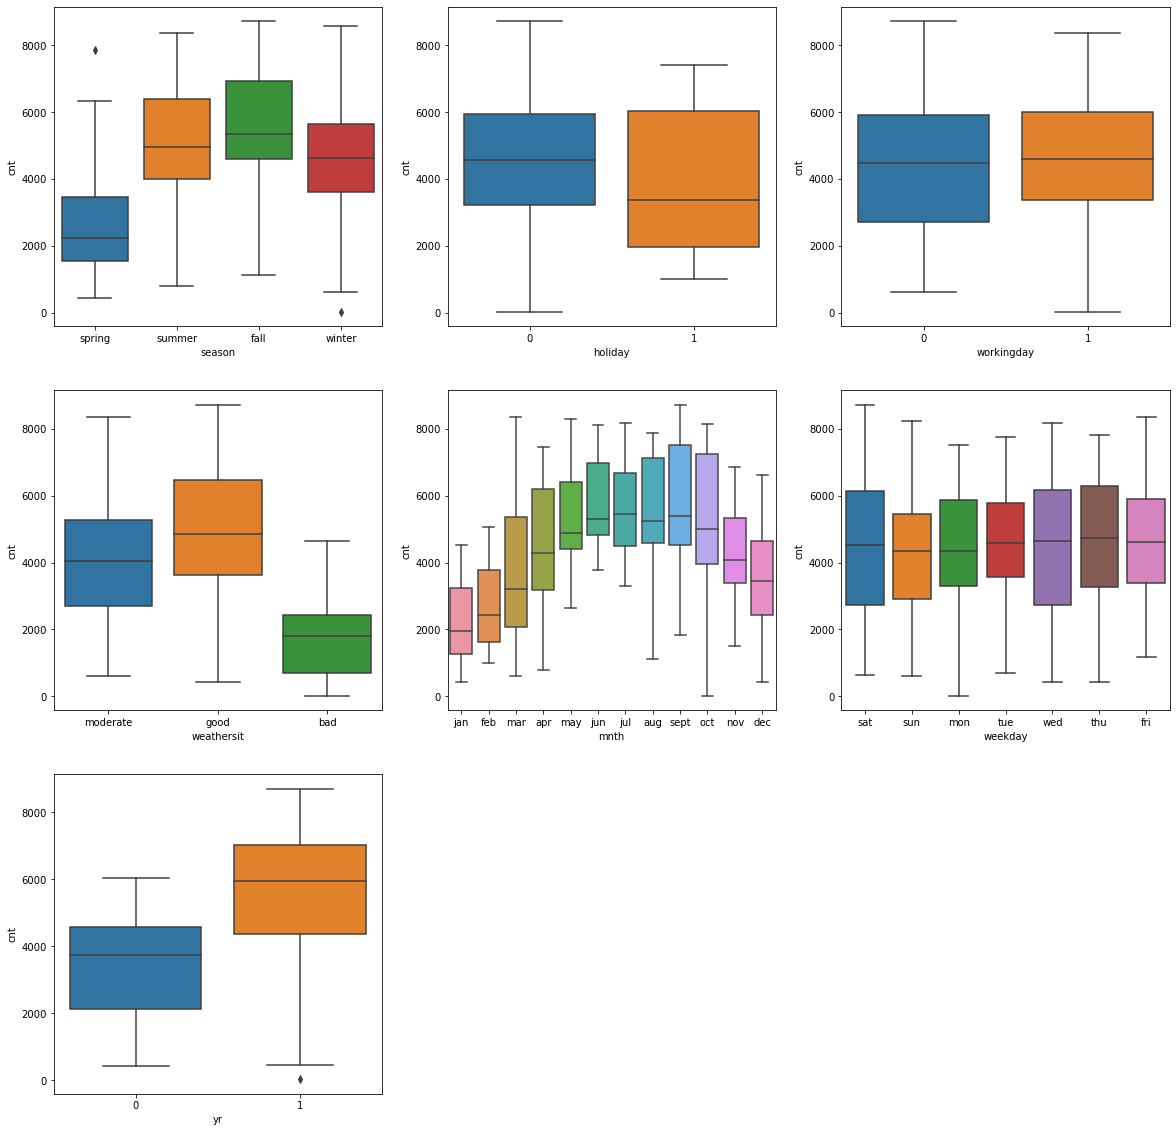

In [27]:
#Plotting for all categorical variables
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt', data=bikeSharing_data)
plt.subplot(3,3,2)
sns.boxplot(x='holiday',y='cnt', data=bikeSharing_data)
plt.subplot(3,3,3)
sns.boxplot(x='workingday',y='cnt', data=bikeSharing_data)
plt.subplot(3,3,4)
sns.boxplot(x='weathersit',y='cnt', data=bikeSharing_data)
plt.subplot(3,3,5)
sns.boxplot(x='mnth',y='cnt', data=bikeSharing_data)
plt.subplot(3,3,6)
sns.boxplot(x='weekday',y='cnt', data=bikeSharing_data)
plt.subplot(3,3,7)
sns.boxplot(x='yr',y='cnt', data=bikeSharing_data)
plt.show()

#### <u>Conclusions</u>

- From above plots we can see that demand for year 2019 i.e next year has been grown
- Season fall has highest demand for rental bikes
- Demand is continuously growing each month till June.
- September month has highest demand. 
- After September,gradually demand is decreasing.
- For holiday variable we can see that when there is a holiday, demand has been decreaing.
- Weekday is not giving clear picture about demand,however still we can assume that Saturday has slighlty more demand compare to other weekday.
- The weathershit has clearly highest demand
- In short,during September, bike sharing demand is more,however in the beginnig of the year and during end of the year it is less, it could be due to extereme weather conditions.

#### Visualizing by comparing multiple categorical variable with target variable

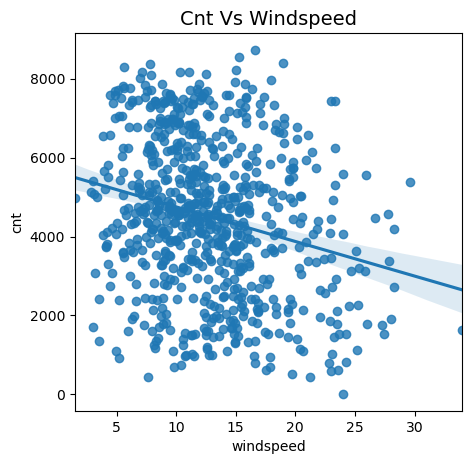

In [28]:
plt.figure(figsize=(5,5),dpi=100)
plt.title("Cnt Vs Windspeed",fontsize=14)
sns.regplot(data=bikeSharing_data,y="cnt",x="windspeed")
plt.show()

By above plot we can see cnt is decreasing with increasing in windspeed.

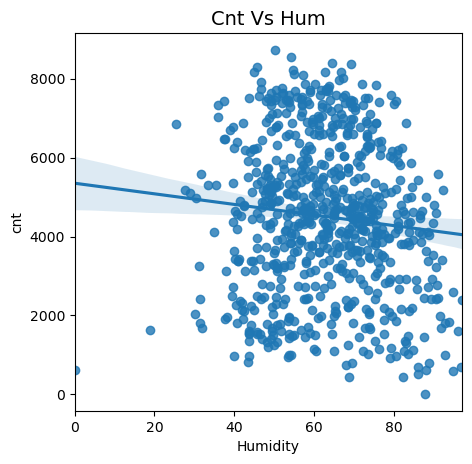

In [29]:
plt.figure(figsize=(5,5),dpi=100)
plt.title("Cnt Vs Hum",fontsize=14)
sns.regplot(data=bikeSharing_data,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

- Humidity's value are more scattered around.
- Also we can see that cnt is decreasing with increase in humidity

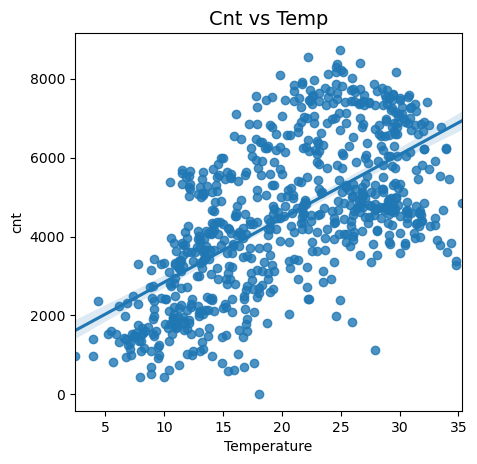

In [30]:
plt.figure(figsize=(5,5),dpi=100)
plt.title("Cnt vs Temp",fontsize=14)
sns.regplot(data=bikeSharing_data,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

- Demand for bikes is positively correlated to temp.
- We can clearly see that cnt is increasing positively with temp.

In [31]:
bikeSharing_data.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,old_business_days
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,364.500000
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,210.877136
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,182.250000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,364.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,546.750000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,729.000000


### <u>Data Preparation</u>

In [32]:
#Subset of all categorical variables
Bike_categorical=bikeSharing_data.select_dtypes(include=['object'])

In [33]:
Bike_categorical

,season,mnth,weekday,weathersit
0,spring,jan,sat,moderate
1,spring,jan,sun,moderate
2,spring,jan,mon,good
3,spring,jan,tue,good
4,spring,jan,wed,good
...,...,...,...,...
725,spring,dec,thu,moderate
726,spring,dec,fri,moderate
727,spring,dec,sat,moderate
728,spring,dec,sun,good


#### Creating dummy variables for all categorical variables

<b>Dummy Variables</b>

The Variables like season,mnth,weekday and weathersit have different levels. We need to convert these levels into integers.

In [34]:
bikeSharing_data = pd.get_dummies(data=bikeSharing_data,columns=["season","mnth","weekday"],drop_first=True)
bikeSharing_data = pd.get_dummies(data=bikeSharing_data,columns=["weathersit"])

In [35]:
bikeSharing_data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'old_business_days', 'season_spring', 'season_summer',
       'season_winter', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'mnth_sept', 'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [36]:
bikeSharing_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,old_business_days,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,0,0,1,0,1,0


### <u>Building the Model</u>

Splitting Data into training and test data

In [37]:
bikeSharing_data.shape

(730, 32)

In [38]:
#y will be containing only target variable.
y=bikeSharing_data.pop('cnt')

#X is all remainig variable and also will be independent variables
X=bikeSharing_data

#Train Test split with 70:30 percent
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

In [39]:
#Checking independent variables
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,old_business_days,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,1,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,2,1,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,3,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,4,1,0,...,0,0,0,0,0,0,1,0,1,0


In [40]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(511, 31)
(219, 31)


##### Feature Scaling for continuous variables
- To make all features in same scale.

In [41]:
# Importing required library
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [42]:
# Lets scale continuous variables
numerical_vars = ['temp','atemp','hum','windspeed','old_business_days']

#Instantiate a MinMaxScaler Object to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[numerical_vars] = scaler.fit_transform(X_train[numerical_vars])

In [43]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,old_business_days,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.502935,0.033268,0.669276,0.535941,0.511328,0.643605,0.351477,0.501899,0.248532,0.244618,...,0.086106,0.150685,0.158513,0.138943,0.140900,0.138943,0.136986,0.029354,0.639922,0.330724
std,0.500481,0.179512,0.470935,0.231451,0.217316,0.145738,0.166797,0.293458,0.432585,0.430282,...,0.280795,0.358092,0.365579,0.346226,0.348259,0.346226,0.344170,0.168963,0.480493,0.470935
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332844,0.322144,0.533168,0.232053,0.249657,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.519232,0.508605,0.640959,0.329480,0.503429,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735734,0.689280,0.750000,0.442941,0.755144,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,old_business_days,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
257,0,0,1,0.645914,0.622978,0.729221,0.512820,0.352538,0,0,...,1,0,0,0,1,0,0,0,0,1
204,0,0,0,0.960541,0.939531,0.566409,0.302593,0.279835,0,0,...,0,0,0,1,0,0,0,0,1,0
624,1,0,1,0.650067,0.622163,0.755355,0.266662,0.855967,0,0,...,1,1,0,0,0,0,0,0,0,1
284,0,0,1,0.603340,0.575784,0.931877,0.465413,0.389575,0,0,...,0,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.497001,0.676936,0.998628,1,0,...,0,0,0,1,0,0,0,0,1,0


#### Build a Model using RFE and Automated approach
- Use RFE to eliminate some columns

In [45]:
# Building a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [46]:
#Cutting numbers of features to 15 using automated approach
rfe = RFE(lr,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [47]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 4),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('old_business_days', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 12),
 ('season_winter', True, 1),
 ('mnth_aug', False, 9),
 ('mnth_dec', False, 7),
 ('mnth_feb', True, 1),
 ('mnth_jan', True, 1),
 ('mnth_jul', False, 11),
 ('mnth_jun', False, 10),
 ('mnth_mar', False, 17),
 ('mnth_may', False, 2),
 ('mnth_nov', False, 8),
 ('mnth_oct', True, 1),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 13),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 6),
 ('weekday_thu', False, 16),
 ('weekday_tue', False, 14),
 ('weekday_wed', False, 15),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', False, 3)]

#### Function to build a model using statsmodel api

In [48]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [51]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.2
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          8.37e-181
Time:                        14:37:54   Log-Likelihood:                -4155.5
No. Observations:                 511   AIC:                             8331.
Df Residuals:                     501   BIC:                             8373.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1971.3832    198.996      9.907      0.000    1580.414    2362.353
yr                   2055.6832     73.968     27.792      0.000    1910.358    2201.009
season_spring       -1190.5213    139.945     -8.507      0.000   -1465.473    -915.569
mnth_jul             -562.5429    149.265     -3.769      0.000    -855.806    -269.280
season_winter         403.8614    111.010      3.638      0.000     185.760     621.963
mnth_sept             428.1907    138.428      3.093      0.002     156.220     700.161
weekday_sun          -436.8983    107.146     -4.078      0.000    -647.410    -226.387
weathersit_bad      -2369.7320    221.401    -10.703      0.000   -2804.721   -1934.743
weathersit_moderate  -649.6854     80.191     -8.102      0.000    -807.237    -492.134
temp                 3768.8193    277.421     13.585      0.000    3223.767    4313.871
==============================================================================
Omnibus:                       53.930   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.552
Skew:                          -0.539   Prob(JB):                     2.23e-30
Kurtosis:                       5.292   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Below is the Function for calculating VIF

In [52]:
#Function to calculate VIF and print them.
def get_vifs(cols):
    df_1 = X_train[cols]
    vifs = pd.DataFrame()
    vifs['Features'] = df_1.columns
    vifs['VIF'] = [variance_inflation_factor(df_1.values, i) for i in range(df_1.shape[1])]
    vifs['VIF'] = round(vifs['VIF'],2)
    print(vifs.sort_values(by='VIF',ascending=False))

In [53]:
X_train.columns[rfe.support_]

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'old_business_days',
       'season_spring', 'season_winter', 'mnth_feb', 'mnth_jan', 'mnth_oct',
       'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_good'],
      dtype='object')

We will start manual elimination for these Columns selected by RFE

In [54]:
X_train.columns[~rfe.support_]

Index(['holiday', 'atemp', 'season_summer', 'mnth_aug', 'mnth_dec', 'mnth_jul',
       'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'weekday_mon',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed',
       'weathersit_moderate'],
      dtype='object')

These features are not selected by RFE

In [55]:
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']]

Here we took 15 cols.supported by RFE

In [56]:
X_train_rfe.shape

(511, 15)

### Build Model
<b>Building Model 1 - Starting with all variables selected by RFE</b>

In [57]:
#Selected columns for Model 1 - all columns selected by RFE
ref_cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

build_model(ref_cols)
get_vifs(ref_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     172.7
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.32e-185
Time:                        14:38:22   Log-Likelihood:                -4127.3
No. Observations:                 511   AIC:                             8287.
Df Residuals:                     495   BIC:                             8354.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2208.7913    

<b>Bulding Model 2</b>

In [58]:
# Dropping the variable mnth_jan as it has negative coefficient and it has high p-value
ref_cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(ref_cols)
get_vifs(ref_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.1
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.47e-186
Time:                        14:38:32   Log-Likelihood:                -4127.8
No. Observations:                 511   AIC:                             8286.
Df Residuals:                     496   BIC:                             8349.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2174.9906    

<b>Building Model 3</b>

In [59]:
# Dropping the variable hum as it has negative coefficient and it has high p-value
ref_cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(ref_cols)
get_vifs(ref_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     191.9
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          3.73e-184
Time:                        14:38:39   Log-Likelihood:                -4136.3
No. Observations:                 511   AIC:                             8301.
Df Residuals:                     497   BIC:                             8360.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1374.0085    

<b>Building Model 4</b>

In [60]:
# Dropping the variable holiday as it has negative coefficient and it has high p-value
ref_cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(ref_cols)
get_vifs(ref_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     207.0
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          9.33e-185
Time:                        14:38:47   Log-Likelihood:                -4137.6
No. Observations:                 511   AIC:                             8301.
Df Residuals:                     498   BIC:                             8356.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1323.8143    

<b>Building Model 5</b>

In [61]:
# Dropping the variable mnth_jul as it has negative coefficient and is insignificant as it has high p-value
ref_cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(ref_cols)
get_vifs(ref_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     223.4
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          8.81e-185
Time:                        14:38:54   Log-Likelihood:                -4140.4
No. Observations:                 511   AIC:                             8305.
Df Residuals:                     499   BIC:                             8356.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1227.1135    

<b>Building Model 6</b>

In [62]:
# Dropping the variable temp as it has negative coefficient and is insignificant as it has high p-value
ref_cols = ['yr', 'workingday', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(ref_cols)
get_vifs(ref_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     164.7
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          3.68e-151
Time:                        14:39:01   Log-Likelihood:                -4222.6
No. Observations:                 511   AIC:                             8467.
Df Residuals:                     500   BIC:                             8514.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4365.0594    

<b>Building Model 7</b>

In [63]:
## Trying to replace July with spring as both were highly correlated

ref_cols = ['yr', 'workingday', 'windspeed', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(ref_cols)
get_vifs(ref_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     82.98
Date:                Wed, 15 Dec 2021   Prob (F-statistic):           1.61e-99
Time:                        14:39:14   Log-Likelihood:                -4345.0
No. Observations:                 511   AIC:                             8712.
Df Residuals:                     500   BIC:                             8759.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2613.7612    

<b>Building Model 8<b>

In [64]:
# Removing windspeed with spring as windspeed was highly correlated with temp
ref_cols = ['yr', 'workingday', 'season_spring', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(ref_cols)
get_vifs(ref_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     159.8
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.08e-148
Time:                        14:39:21   Log-Likelihood:                -4228.5
No. Observations:                 511   AIC:                             8479.
Df Residuals:                     500   BIC:                             8526.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4053.2261    

<b>Building Model 9</b>

In [65]:
# adding temp and removing 'season_summer' and 'workingday'feature
ref_cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']
build_model(ref_cols)
get_vifs(ref_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.2
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          8.37e-181
Time:                        14:39:28   Log-Likelihood:                -4155.5
No. Observations:                 511   AIC:                             8331.
Df Residuals:                     501   BIC:                             8373.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1971.3832    

#### <u>Conclusion:<u/>

- By seeing all above models, we can say that VIF seems to be almost accepted. p-value for all the features is almost 0.0 and R2 is 0.819.
- Lets now select Model no.9 as our final as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi coliinear (high VIF) variables.
- Difference between R-squared and Adjusted R-squared values for this model is very less, which also means that there are no additional parameters that can be removed from this model.

In [66]:
#Now Building a model with all columns.
def build_model(X,y):
    lr_1 = LinearRegression()
    lr_1.fit(X,y)
    return lr_1

In [67]:
#Let us now build the finalmodel using sklearn
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#Building a model with above columns
lr = build_model(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

1971.383159419017 [ 2055.68318464 -1190.52125817  -562.54285296   403.86136251
   428.19072322  -436.8982626  -2369.73199792  -649.68538603
  3768.81932794]


### Model Evaluation

<b>Performing Residucal Analysis</b>

In [68]:
y_train_pred = lr.predict(X_train[cols])

In [69]:
#Ploting histogram for the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

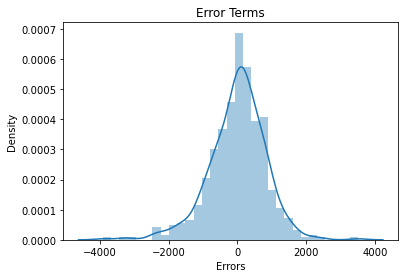

In [70]:
plot_res_dist(y_train, y_train_pred)

Errors are normally distribured here with mean 0

<b>Lets plot one graph for checking the actual and predicted values</b>

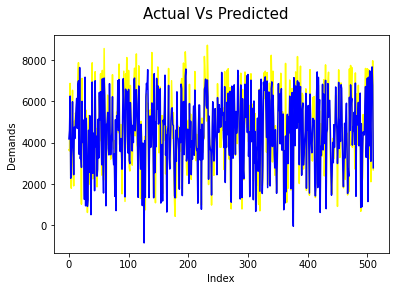

In [71]:
chk = [i for i in range(0,len(X_train),1)]
plt.plot(chk,y_train, color="yellow")
plt.plot(chk,y_train_pred, color="blue")
plt.suptitle('Actual Vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

Now by above plot it seems like Actual and Predicted result have almost the same pattern so this model seems good.

- <b>Now will be checking the error an ploting the error term</b>

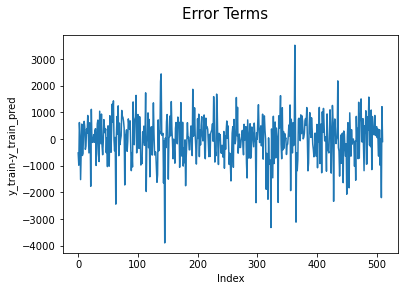

In [72]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

Now by above plot it can be say that the error terms are independent of each other.


- Now printing the R-squared value

In [73]:
r2_score(y_train,y_train_pred)

0.8209375039962972

Now by seeing the R-squared value , it is clearly seen tht the r2-score value is same as our final Model which we built above.

#### Linearity Check for model built using Scatter Plot

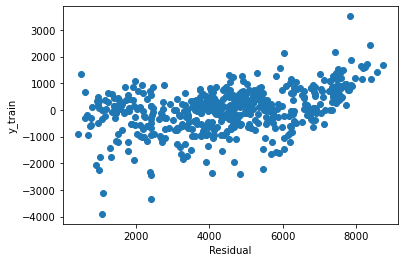

In [74]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

####  Predicting values for test data set

In [75]:
#Scale variables in X_test
nums_vars = ['temp','atemp','hum','windspeed','old_business_days']

#Test data to be transformed only, no fitting
X_test[nums_vars] = scaler.transform(X_test[nums_vars])

In [76]:
#Columns from our final model
ref_cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#Predict the values for test data
y_test_pred = lr.predict(X_test[ref_cols])

In [77]:
print(y_test_pred)

[5972.16681263 6567.84050657 6892.87311178 6149.04523954 2930.58454611
 3232.40573982 5247.39746429 4675.74390615 7134.51035126 4773.57846355
 3948.56615856 6669.80675184 2414.00981783 6171.7525031  4128.15378508
 3807.24817161 6085.6535843  5714.70795056 5973.16002688 1876.7967895
 5692.63328316 5118.25378222 3626.88713918 4980.99260922 4246.25661479
 5846.99010625 5090.56750135 6293.12282612 4450.17166875 5212.17646009
 5827.42131632 1277.98462194 6070.05646619 6633.53743723 1211.50958922
 6617.83464085 4508.87334242 4894.89838655 1568.99808572 3737.92312954
 4194.39018208 6167.83592743 5035.78240335 4200.48616572 5768.66454649
 3518.08565296 1242.76361773 5730.93766483 4214.6819779  5803.94064685
 3675.4752714  4171.19854834 7041.36577544 7142.33880646 7029.84055291
 4371.27330512 5660.55075258 7586.18174395  702.70822    5460.33246595
 2661.04121741 3701.58515901 1732.3390148  5897.86332472 3039.08992811
 4598.4666568  6362.63065418 4167.28666881 6629.57497559 1082.31550713
 3850.0

#### R-Squared value for test predictions

In [78]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.8123814098755181

So by seeing the r2 score value we can say that R2 value for predictions on test data (0.815) is almost same as R2 value of train data(0.819). This is a good R-squared value, hence we can see our model is performing good even on unseen data (test data)

#### Ploting Test vs Predicted test values

In [79]:
#Taking Actual and Predicted values as input along with the scale and Title to indicate which data
def plot_actual_predicted(act,pred,scale,dataname):
    chking = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(chking,act, color="Yellow", linewidth=2.5, linestyle="-")
    plt.plot(chking,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted Values - '+dataname, fontsize=20)
    plt.xlabel('Index', fontsize=18)        
    plt.ylabel('Counts', fontsize=16)                               

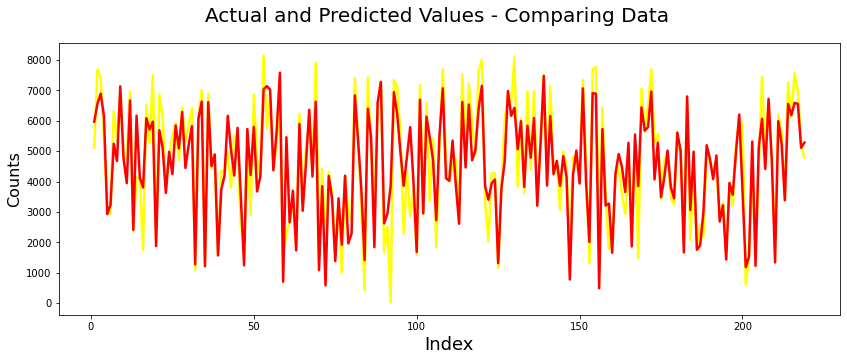

In [80]:
#Plot Actual Vs Predicted for Test Data
plot_actual_predicted(y_test,y_test_pred,len(y_test)+1,'Comparing Data')

#### Ploting Error Terms data for test data

In [81]:
# Error terms
def plot_error_terms(act,pred):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error-Terms', fontsize=20)
    plt.xlabel('Index', fontsize=18)                      
    plt.ylabel('Cnts-Predicted Counts', fontsize=16)                

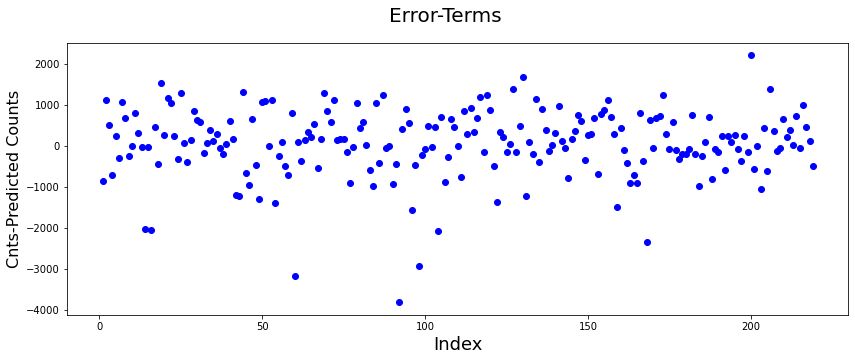

In [82]:
#Plot error terms for test data
plot_error_terms(y_test,y_test_pred)

By above plot it is clearly seen that the error terms are randomly distributed and there is no pattern, which indicates that the output is well eleborated by the model.

<b>After all these studies now its time for making the predections.</b>

### Making Prdections

In [ ]:
# Checking data before scaling
bikeSharing_data.head()

####  Intrepretting the Model

We will be interpretting the RFE with Manual model results.

In [50]:
#rebuilding the final model(manual+ref approach)using statsmodel to interpret it
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

lm = build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.2
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          8.37e-181
Time:                        14:36:24   Log-Likelihood:                -4155.5
No. Observations:                 511   AIC:                             8331.
Df Residuals:                     501   BIC:                             8373.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1971.3832    

In [83]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.8123814098755181

### <u>Conclusions</u>:

<b>Analysing the above model, the comapany should focus on the following features:</b>
- Company should focus on expanding business during Spring.
- Company should focus on expanding business during September.
- There would be less bookings during Light Snow or Rain, they could probably use this time to serive the bikes without having business impact.

<b>Significant variables to predict the demand for shared bikes</b>
- holiday
- temp
- hum
- windspeed
- Season
- months(January, July, September, November, December)
- Year (2019)
- Sunday
- weathersit( Light Snow, Mist + Cloudy)